# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [75]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

import warnings
warnings.filterwarnings('ignore')

In [42]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [44]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [45]:
print('Total no of resumes: ', data.shape[0])
print('Number of resumes with black-sounding names:', sum(data.race=='b'))
print('Number of callbacks for black-sounding names:', sum(data[data.race=='b'].call))
print('Number of resumes with white-sounding names:', sum(data.race=='w'))
print('Number of callbacks for white-sounding names:', sum(data[data.race=='w'].call))

Total no of resumes:  4870
Number of resumes with black-sounding names: 2435
Number of callbacks for black-sounding names: 157.0
Number of resumes with white-sounding names: 2435
Number of callbacks for white-sounding names: 235.0


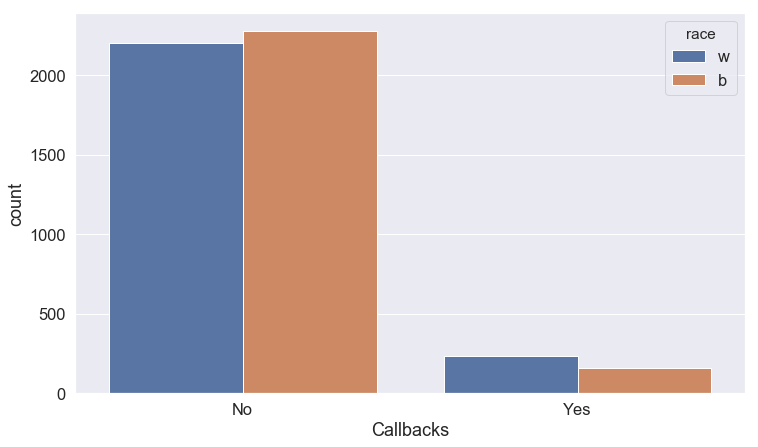

In [46]:
plt.figure(figsize=(12, 7))

_ = sns.countplot('call', hue = 'race', data = data )
_ = plt.xticks([0,1],['No','Yes'])
_ = plt.xlabel('Callbacks')

# Exploratory Data Analysis

Before moviong forward let us understand the data we have. We have a random sample of 4,870 resumes, and 50% are black- 
and 50% are white-sounding names. 
Let a callback for each resume is considered a success and failure otherwise.
Figure above shows the countplot of the callback data based on race.
From the countplot it seems that number of resume with white-sounding names have higher success and lower failure counts
copmared to resume with black-sounding names.

So based on race we have two binomial distributions: one from black-sounding name resume and one for white-sounding name resume.


In [56]:
# Success rate of black-sounding resume
pb_sample = sum(data[data.race=='b'].call)/sum(data.race=='b')
# Sucess rate of white-soubnding resume
pw_sample = sum(data[data.race=='w'].call)/sum(data.race=='w')
# Overall success rate of the whole sample
p_sample = sum(data.call)/len(data.call)

print('Success rate of black-sounding resume: %0.3f'% pb_sample)
print('Success rate of white-sounding resume: %0.3f'% pw_sample)
print('Overall success rate of sample: %0.3f'% p_sample)

Success rate of black-sounding resume: 0.064
Success rate of white-sounding resume: 0.097
Overall success rate of sample: 0.080


<div class="span5 alert alert-success">
<p>
    
# A/B Testing

To study the impact of race on the callback rate we will consider the classic A/B test.

We will study two independent samples (one sample with black-sounding names and one with white-sounding names).

As shown above both samples have a binomial distribution B(nb,pb) and B(nw,pw) where (nb, pb) = (2435, 0.064) and (nw, pw) = (2435, 0.097)

If we can prove that both samples satisfy the central limit theorem, we can assumes that both samples have normal probabality distribution :

N(pb, pb(1-pb)/nb) and N(pw, pw(1-pw)/nw)



# Central Limit Theorem

Before proceeding with the analysis we first establish that the two data sets satisfy the CTl conditions:
    
1. Randomness: As stated in the introduction researchers randomly assigned identical résumés 
    to black-sounding or white-sounding names to observe the impact on requests for interviews from employers.
    Thus we can safely assume that sample data is random.
2. Normality: Since we are dealing with proportions as long as we have more than 10 success and failurs in both samples, we can assume that condition of normality is satisfied. This was already shown in countplot above thus second condition is also satisfied.
3. Independence: Independence depends on the sample size. Considering the entire population of US with black-sounding and white-sounding names our sample of total size 4870 is really small (<10%) thus we can assume independence.


### Since the samples satisfy the CLT we can compare the two samples as normal distributions.


</p>
</div>

<div class="span5 alert alert-success">
<p>
    
### Null Hypothesis: 

Race (black- or white-sounding names) has no impact on the callbacks. In other words, Pb - Pw = 0

### Alternate Hypothesis:

Race has impact on the callbacks by employer. Pb != Pw

#### For the A/B testing we will assume a significance level of 5% (0.05)

Thus is the probability of getting the value (pw - pb) or farther from the (Pb - Pw), which is zero, is less than 0.05 we will reject the null hypothesis.

Note that this is a two tailed test as apparent from the alternate hypothesis.

</p>
</div>

In [128]:
# Sample data for white-sounding names
w_data = data[data.race=='w'].call.values
# Sample data for black-sounding names
b_data = data[data.race=='b'].call.values
# Significance level
alpha = 0.05

# Bootstrap Approach

We draw about 10000 samples from each sample distributions.

Note that since this is binomial distribution the mean is equal to proportion of sucess (p).

Thus the function we pass when drawing the bootstrap samples is np.mean.

Note that our null hypothesis is claiming that the mean (proportion of success) of the two sample distributions is same. We are not trying to prove that the both samples come from same population and the samples can have different standard deviations.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

If the distribution of the bootstrap replicates(difference in mean here) is almost normal then 95% confidence is computed using the standard error and margin of error is twice the standard error.


In [59]:
# Function to Draw bootstrap samples for simulations
def draw_bs_reps(data, func, size=1):
    """
    Draw bootstrap replicates.
    input:
    data = 1D array
    func = function that computes the test statistics
    size = # of simulations
    output:
    bs_replicates = test statistics from each simulation
    """
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

In [83]:
# Mean value of the whole sample

mean_sample = np.mean(data.call.values)

# Generate shifted arrays
w_shifted = w_data - np.mean(w_data) + mean_sample
b_shifted = b_data - np.mean(b_data) + mean_sample

# Compute 10,000 bootstrap replicates from shifted arrays
n_sim = 10000  

bs_replicates_w = draw_bs_reps(w_shifted , np.mean, n_sim)
bs_replicates_b = draw_bs_reps(b_shifted , np.mean, n_sim)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_w - bs_replicates_b 


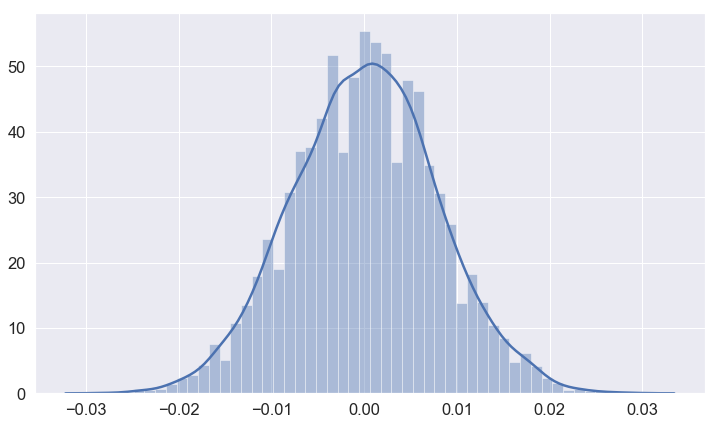

In [113]:
plt.figure(figsize=(12, 7))
_ = sns.distplot(bs_replicates)

In [123]:
# Standard Error is standard deviation of sampling distribution of the bootstrapped replicates (diff of mean here)
SE = np.std(bs_replicates)
# Margin of Error of Bootstrapped Sample = 2SE -> 95% CI
MOE = 2*SE
# Mean of the bootstrap distribution
bs_mu = np.mean(bs_replicates)
# Sample at 2.5%
ci_low = bs_mu-MOE
# Sample at 97.5%
ci_high = bs_mu+MOE

print('Bootstrap statistic: %0.3f'% bs_mu)
print('Confidence interval of difference of proportions: ( %0.3f'%ci_low, ', %0.3f'%ci_high,')')

Bootstrap statistic: 0.000
Confidence interval of difference of proportions: ( -0.015 , 0.016 )


In [132]:
# Sample difference of mean
sample_diff_mean = np.mean(w_data)-np.mean(b_data)
print('Actual sample difference of means: %0.3f '% sample_diff_mean)

# Compute and print p-value: p
# Distance of sample difference of mean from the bootstrap mean
p = (np.sum(bs_replicates <= bs_mu-sample_diff_mean) + np.sum(bs_replicates >= bs_mu+sample_diff_mean))/n_sim

if p < alpha:
    print('\n p-value %0.3f'% p,' suggests that null hypothesis can be rejected.')
else:
    print('\n p-value %0.3f'% p,' suggests that null hypothesis cannot be rejected.')

Actual sample difference of means: 0.032 

 p-value 0.000  suggests that null hypothesis can be rejected.


# Frequentist Statistical Approach

For the frequentist approach, since the sample size is large with more than 2000 sample points, z- statistic can provide reliable results for the confidence intervals and p-values. We will test our result using the basic formula approach and the built-in library method.

The A/B testing is looking for a significant diffenence between the callback proportions of black- and white-sounding names. Based on CLT we can assume that both distributions are normal and the distribution of the difference is also normal: 

Normal( (pw-pb), p(1-p)(1/nw + 1/nb) ) where p = (nw x pw + nb x pb)/(nw+nb)

In [146]:
# Using Basic Formula

# Null hypothesis
Pw = 0 # Can be any value other can zero. We are interested in (Pw - Pb) = 0
Pb = 0 # Can be any value other than zero. We are interested in (Pw - Pb) = 0

# If null hypothesis is true, them the standard deviation of differenced sample distribtuion is
sig_sample_diff = np.sqrt(2*p_sample*(1-p_sample)/len(w_data))

# 95% CI corresponds to z-score of 1.96

MOE = 1.96*sig_sample_diff

# Null hypothesis statistic: true population proportion difference is zero

ci_low, ci_high = (pw_sample-pb_sample)-MOE, (pw_sample-pb_sample)+MOE

print('For the given sample the statistic is: %0.3f' %(pw_sample-pb_sample))

print('Confidence interval of difference of proportions: ( %0.3f'%ci_low, ', %0.3f'%ci_high,')')


For the given sample the statistic is: 0.032
Confidence interval of difference of proportions: ( 0.017 , 0.047 )


In [153]:
# Z- statistic

z = ((pw_sample-pb_sample) - (Pw - Pb))/sig_sample_diff 

import statsmodels.api as sm
zscore, pval = sm.stats.proportions_ztest([sum(w_data), sum(b_data)], [len(w_data), len(b_data)], alternative='two-sided')

print('Manual calculation of z: {:.6f}'.format(z))
print('Z-score from statsmodels: {:.6f}'.format(zscore))
print('Statsmodels pvalue: {:.6f}'.format(pval))

if pval < alpha:
    print('\n p-value %0.3f'% pval,' suggests that null hypothesis can be rejected.')
else:
    print('\n p-value %0.3f'% pval,' suggests that null hypothesis cannot be rejected.')

Manual calculation of z: 4.108412
Z-score from statsmodels: 4.108412
Statsmodels pvalue: 0.000040

 p-value 0.000  suggests that null hypothesis can be rejected.


<div class="span5 alert alert-success">
<p>
    
# Final Conclusions: 

Both bootstrapped and frequentist approach suggests that the null hypothesis can be rejected as the p-value is lowers than the significance level of 5%. Even though we have a big sample, but it is just one sample of poupulation data.

Moreover race is not the only factor ad there were more than 60 feartures for the data. Under such circumstance, rejecting the null hypothesis is not wise choice. In situations like this machine learning (linear regression) might be able to provide better insight into what factors other than race might be contributing to the callback decisions.
</p>
</div>